# Classification

# Import Libraries

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score ,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Import Dataset

In [110]:
binary = pd.CategoricalDtype(categories=[0, 1])
df = pd.read_csv(
    'hepatitis.data',
    header=None,
    na_values='?',
    names='Class,Age,Sex,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY'.split(','),
    
)
df

,Class,Age,Sex,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,2,31,1,NaN,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   STEROID          154 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          154 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER_BIG        145 non-null    float64
 9   LIVER_FIRM       144 non-null    float64
 10  SPLEEN_PALPABLE  150 non-null    float64
 11  SPIDERS          150 non-null    float64
 12  ASCITES          150 non-null    float64
 13  VARICES          150 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK_PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

In [112]:
df.Class.value_counts()

2    123
1     32
Name: Class, dtype: int64

# Fill Nan Values

In [113]:
df=df.fillna({'STEROID':1, 'FATIGUE':1, 'MALAISE':1, 'ANOREXIA':1,'LIVER_BIG':1,'LIVER_FIRM':1,'SPLEEN_PALPABLE':1,'SPIDERS':1,'ASCITES':1,'VARICES':1})

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   STEROID          155 non-null    float64
 4   ANTIVIRALS       155 non-null    int64  
 5   FATIGUE          155 non-null    float64
 6   MALAISE          155 non-null    float64
 7   ANOREXIA         155 non-null    float64
 8   LIVER_BIG        155 non-null    float64
 9   LIVER_FIRM       155 non-null    float64
 10  SPLEEN_PALPABLE  155 non-null    float64
 11  SPIDERS          155 non-null    float64
 12  ASCITES          155 non-null    float64
 13  VARICES          155 non-null    float64
 14  BILIRUBIN        149 non-null    float64
 15  ALK_PHOSPHATE    126 non-null    float64
 16  SGOT             151 non-null    float64
 17  ALBUMIN         

## For numeric Nan use KNN imputer

In [115]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit(df[['BILIRUBIN']])
df[['BILIRUBIN']]= imputer.transform(df[['BILIRUBIN']])

In [116]:
imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
imputer.fit(df[['ALK_PHOSPHATE']])
df[['ALK_PHOSPHATE']]= imputer.transform(df[['ALK_PHOSPHATE']])

In [117]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit(df[['ALBUMIN']])
df[['ALBUMIN']]= imputer.transform(df[['ALBUMIN']])

In [118]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit(df[['SGOT']])
df[['SGOT']]= imputer.transform(df[['SGOT']])

In [119]:
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
imputer.fit(df[['PROTIME']])
df[['PROTIME']]= imputer.transform(df[['PROTIME']])

# Preprocessing data

In [120]:
df['Class']=df.Class.replace((1, 2), ('Die', 'Live'))
df['Sex']=df.Sex.replace((1, 2), ('male', 'female'))
df['STEROID']=df.STEROID.replace((1, 2), ('no', 'yes'))
df['ANTIVIRALS']=df.ANTIVIRALS.replace((1, 2), ('no', 'yes'))
df['FATIGUE']=df.FATIGUE.replace((1, 2), ('no', 'yes'))
df['MALAISE']=df.MALAISE.replace((1, 2), ('no', 'yes'))
df['ANOREXIA']=df.ANOREXIA.replace((1, 2), ('no', 'yes'))
df['LIVER_BIG']=df.LIVER_BIG.replace((1, 2), ('no', 'yes'))

df['LIVER_FIRM']=df.LIVER_FIRM.replace((1, 2), ('no', 'yes'))
df['SPLEEN_PALPABLE']=df.SPLEEN_PALPABLE.replace((1, 2), ('no', 'yes'))
df['SPIDERS']=df.SPIDERS.replace((1, 2), ('no', 'yes'))
df['ASCITES']=df.ASCITES.replace((1, 2), ('no', 'yes'))
df['VARICES']=df.VARICES.replace((1, 2), ('no', 'yes'))
df['HISTOLOGY']=df.HISTOLOGY.replace((1,2), ('no', 'yes'))


In [121]:
df.Class.value_counts()

Live    123
Die      32
Name: Class, dtype: int64

In [122]:
df

,Class,Age,Sex,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,Live,30,female,no,yes,yes,yes,yes,no,yes,yes,yes,yes,yes,1.0,85.000000,18.0,4.0,61.852273,no
1,Live,50,male,no,yes,no,yes,yes,no,yes,yes,yes,yes,yes,0.9,135.000000,42.0,3.5,61.852273,no
2,Live,78,male,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,0.7,96.000000,32.0,4.0,61.852273,no
3,Live,31,male,no,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,0.7,46.000000,52.0,4.0,80.000000,no
4,Live,34,male,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,1.0,105.325397,200.0,4.0,61.852273,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Die,46,male,yes,yes,no,no,no,yes,yes,yes,no,no,no,7.6,105.325397,242.0,3.3,50.000000,yes
151,Live,44,male,yes,yes,no,yes,yes,yes,no,yes,yes,yes,yes,0.9,126.000000,142.0,4.3,61.852273,yes
152,Live,61,male,no,yes,no,no,yes,no,no,yes,no,yes,yes,0.8,75.000000,20.0,4.1,61.852273,yes
153,Live,53,female,no,yes,no,yes,yes,yes,yes,no,no,yes,no,1.5,81.000000,19.0,4.1,48.000000,yes


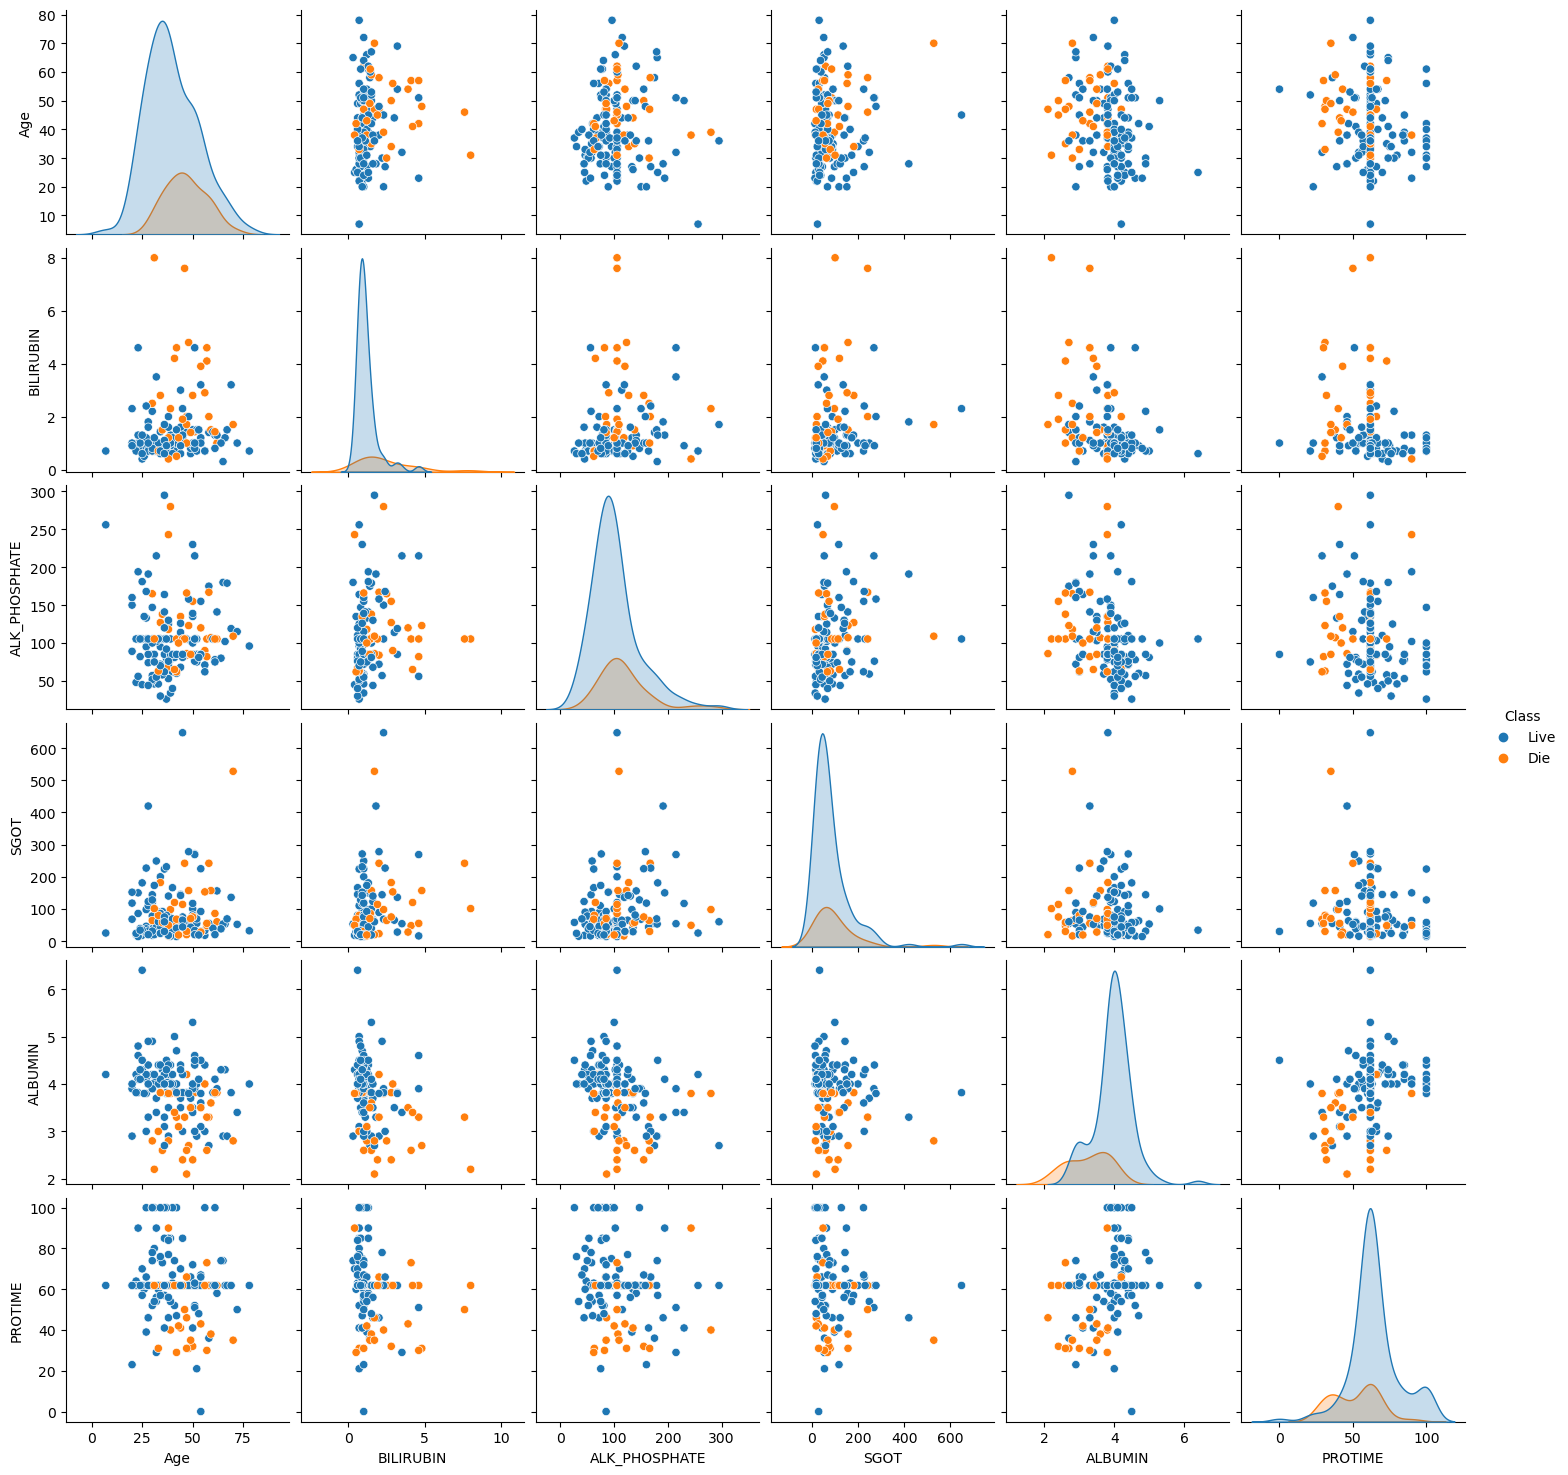

In [123]:
sns.pairplot(df,hue='Class')
plt.show()

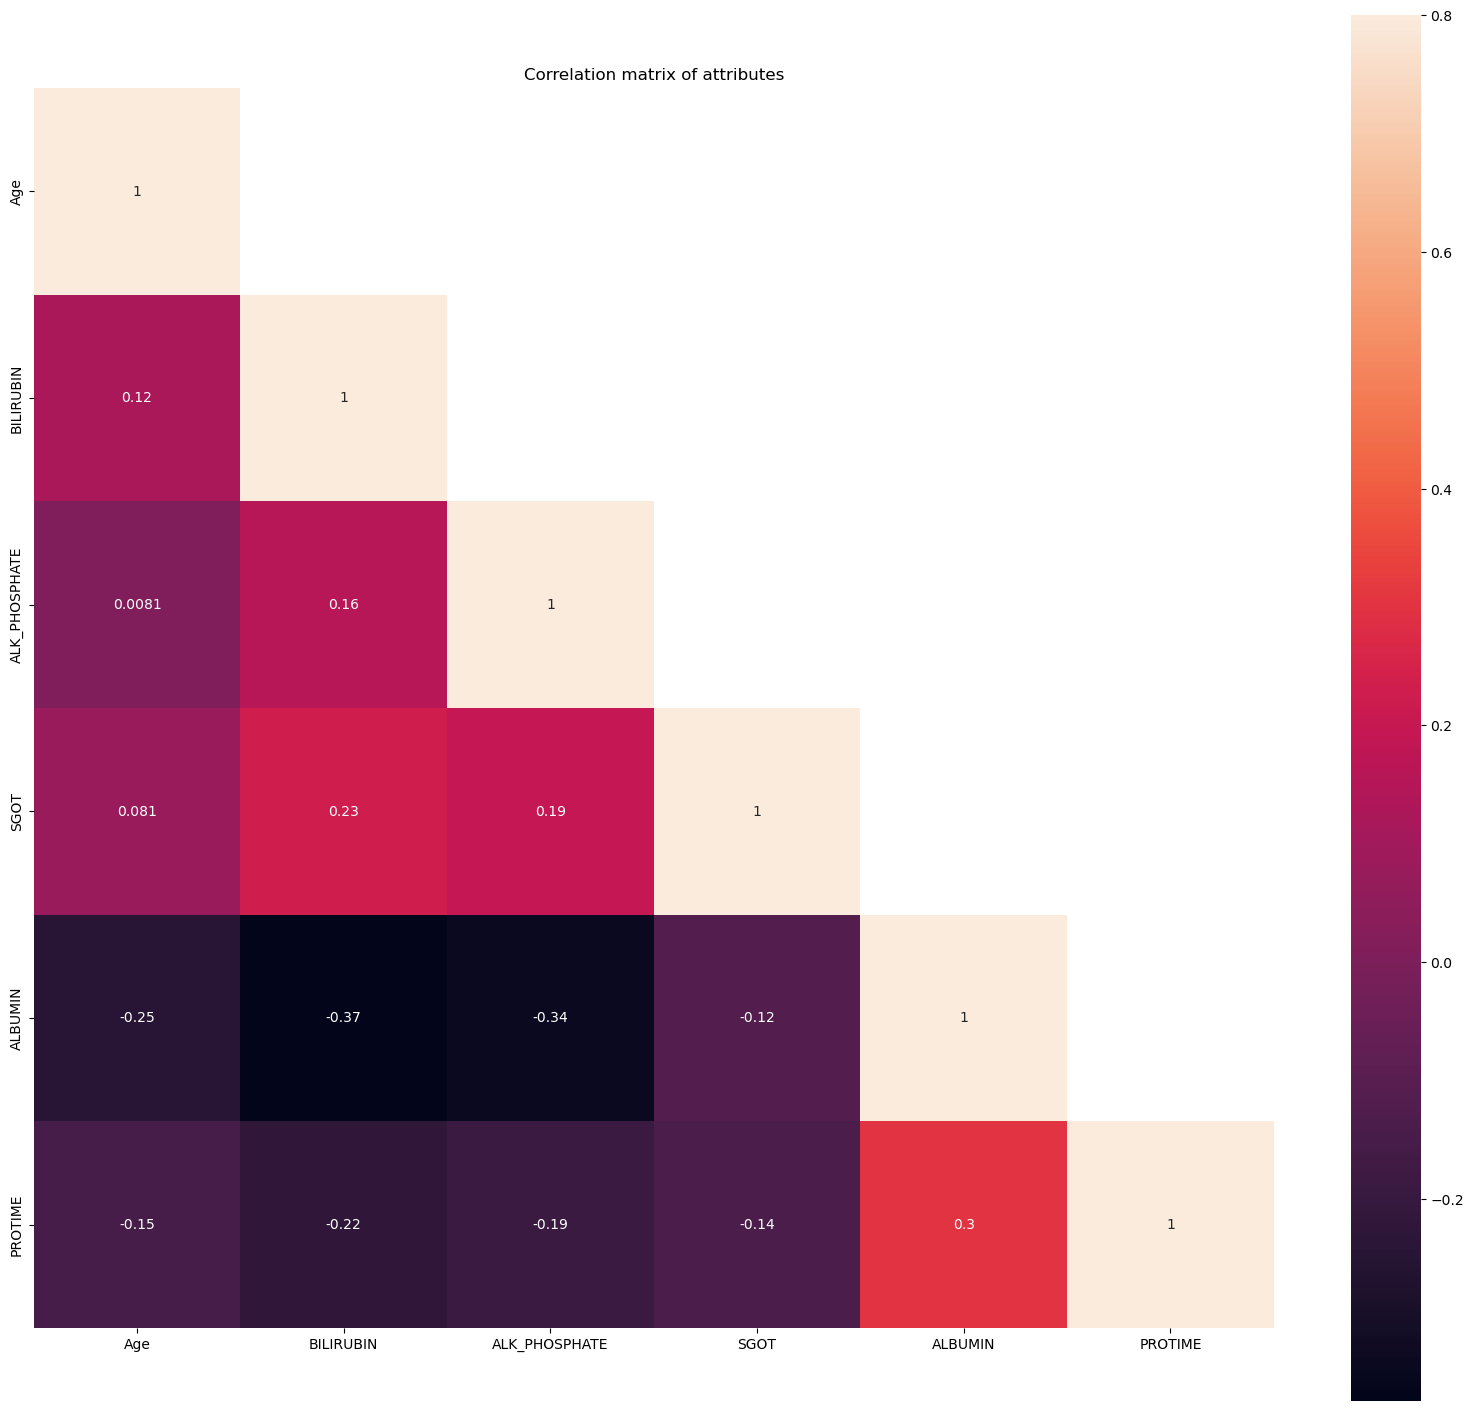

In [124]:
correMtr=df.corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(20,18))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

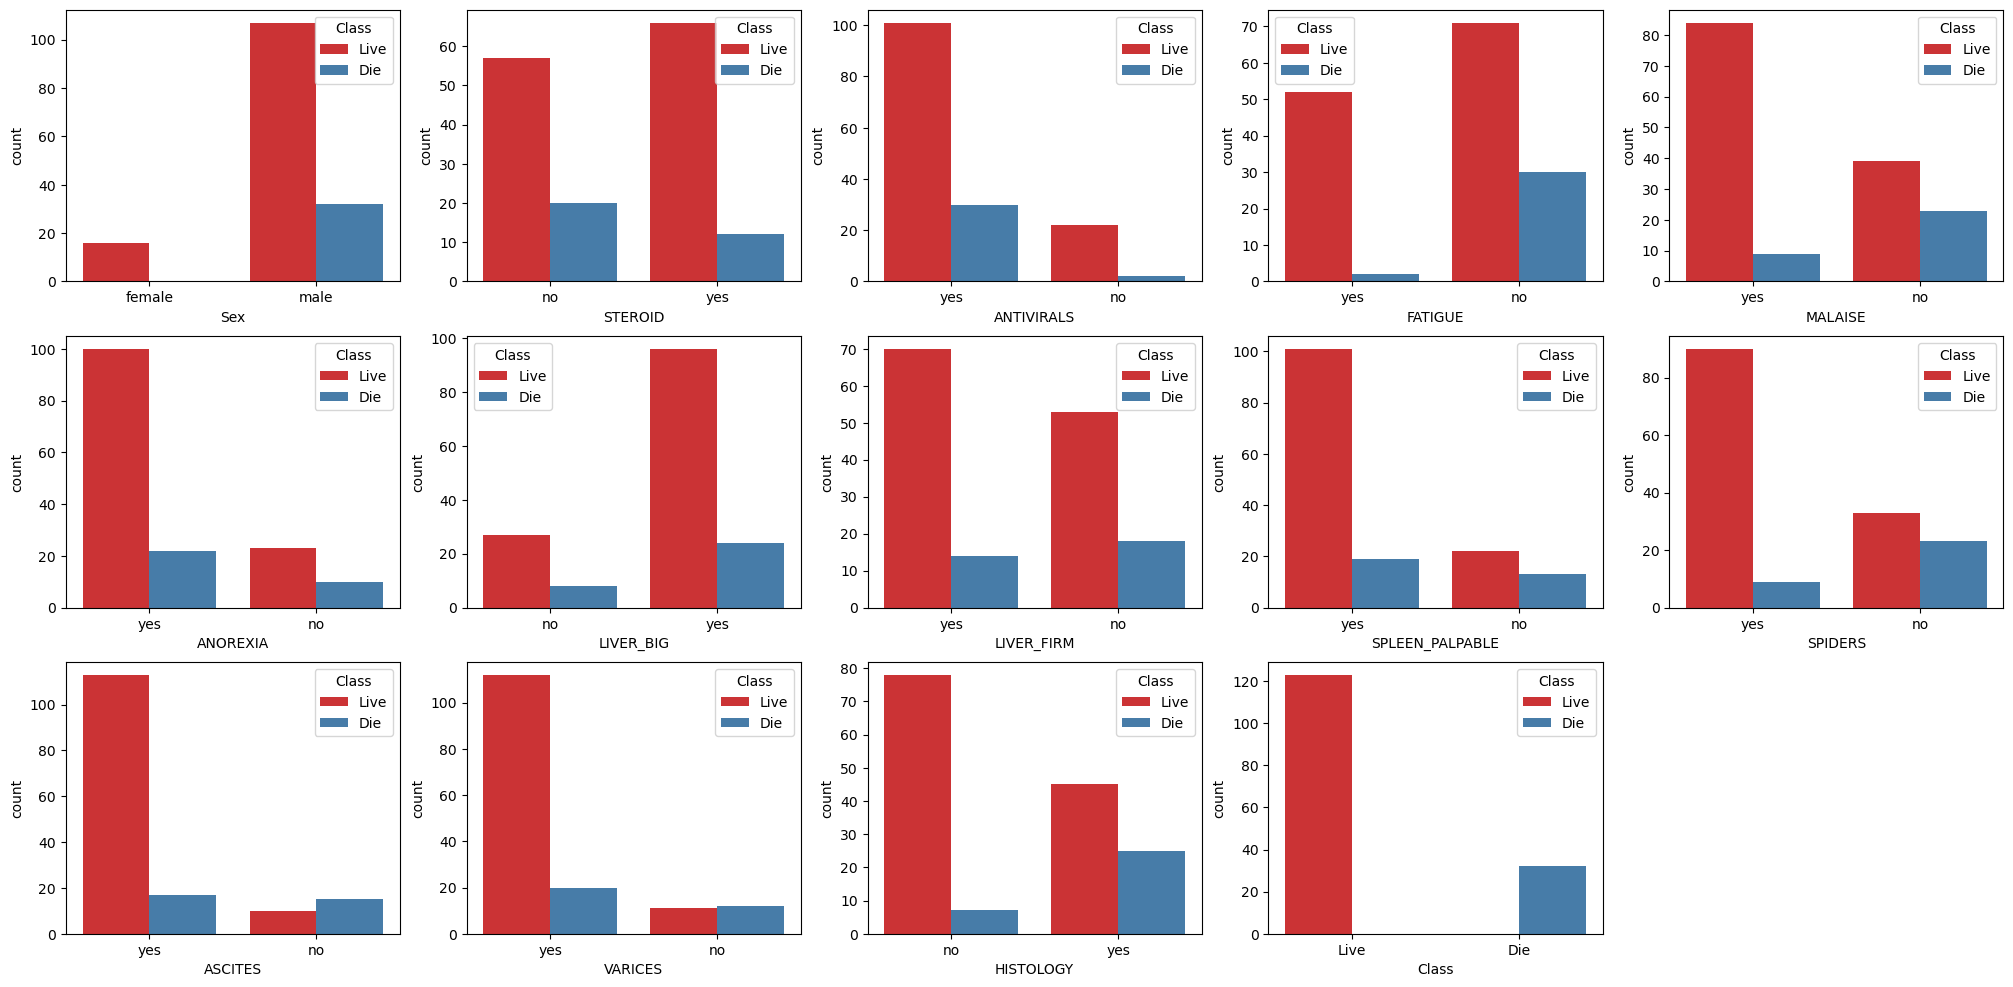

In [125]:
plt.figure(figsize=(25,12))
cat_vars =['Sex', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY','Class'] 
i = 1
for var in cat_vars:
    
    plt.subplot(3,5,i)
    sns.countplot(x=var, hue="Class", data=df, palette="Set1")
    i+=1
    
plt.show()

# Get.dummies

In [126]:
s =df.drop(['Class'],axis=1).dtypes == 'object'
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',len(object_cols))

Categorical variables:
['Sex', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']
No. of. categorical features:  13


In [127]:
df= pd.get_dummies(df, columns = object_cols)
df

,Class,Age,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,Sex_female,Sex_male,STEROID_no,...,SPLEEN_PALPABLE_no,SPLEEN_PALPABLE_yes,SPIDERS_no,SPIDERS_yes,ASCITES_no,ASCITES_yes,VARICES_no,VARICES_yes,HISTOLOGY_no,HISTOLOGY_yes
0,Live,30,1.0,85.000000,18.0,4.0,61.852273,1,0,1,...,0,1,0,1,0,1,0,1,1,0
1,Live,50,0.9,135.000000,42.0,3.5,61.852273,0,1,1,...,0,1,0,1,0,1,0,1,1,0
2,Live,78,0.7,96.000000,32.0,4.0,61.852273,0,1,0,...,0,1,0,1,0,1,0,1,1,0
3,Live,31,0.7,46.000000,52.0,4.0,80.000000,0,1,1,...,0,1,0,1,0,1,0,1,1,0
4,Live,34,1.0,105.325397,200.0,4.0,61.852273,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,Die,46,7.6,105.325397,242.0,3.3,50.000000,0,1,0,...,0,1,1,0,1,0,1,0,0,1
151,Live,44,0.9,126.000000,142.0,4.3,61.852273,0,1,0,...,0,1,0,1,0,1,0,1,0,1
152,Live,61,0.8,75.000000,20.0,4.1,61.852273,0,1,1,...,0,1,1,0,0,1,0,1,0,1
153,Live,53,1.5,81.000000,19.0,4.1,48.000000,1,0,1,...,1,0,1,0,0,1,1,0,0,1


# Splitting the dataset into the Training set and Test set

In [128]:
X = df.drop(['Class'],axis=1).values
y = df['Class'].values


In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [132]:
def Show(model):
    
    print(classification_report(y_test, Y_pred))

    cm = confusion_matrix(y_test, Y_pred)
    accuracy = accuracy_score(y_test,Y_pred)
    print('Confusion matrix \n',cm)
    print('accuracy: %.3f' %accuracy)
    
def table(model):
    test_score = accuracy_score(y_test, model.predict(X_test)) * 100
    train_score = accuracy_score(y_train, model.predict(X_train)) * 100

    results_df = pd.DataFrame(data=[[model[1], train_score, test_score]], 
                              columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
    print(results_df)

def plotROC(model):
    y_proba =model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right')

    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    thresholds = thresholds[thresholds < 1]
    # f, ax = plt.subplots(figsize=(21, 10))
    # ploting FPR and TPR
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=thresholds, y=tpr,
                        mode='lines+markers',
                        name='TPR'))
    fig.add_trace(go.Scatter(x=thresholds, y=fpr,
                        mode='lines+markers',
                        name='FPR'))

    fig.update_layout(
        title="TPR and FPR for different thresholds",
        xaxis_title="Threshold",
        yaxis_title="Metric value",    
    )
    fig.show()

  

# 1.SVC

In [133]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import plotly.express as px
import plotly.graph_objects as go
from sklearn.feature_selection import SelectFromModel

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

## Model without hyperparameter

In [135]:
Svc = make_pipeline(StandardScaler(), SVC(probability=True))

Svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(probability=True))])

In [136]:
Y_pred = Svc.predict(X_test) 

In [137]:
Show(Svc)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.86      0.97      0.91        31

    accuracy                           0.85        39
   macro avg       0.80      0.67      0.70        39
weighted avg       0.84      0.85      0.83        39

Confusion matrix 
 [[ 3  5]
 [ 1 30]]
accuracy: 0.846


In [138]:
train_score11 = accuracy_score(y_train, Svc.predict(X_train)) * 100

test_score11 = accuracy_score(y_test, Svc.predict(X_test)) * 100
print(test_score11,train_score11 )

84.61538461538461 95.6896551724138


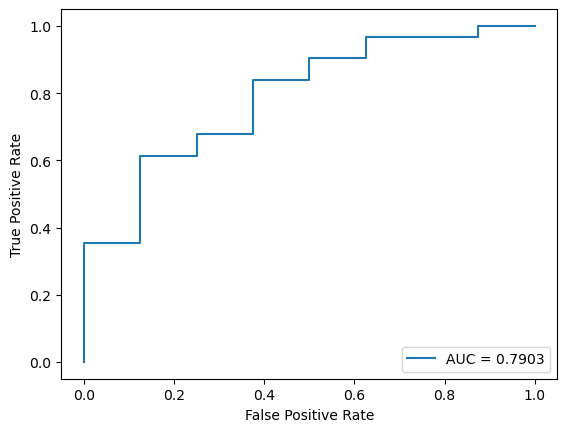

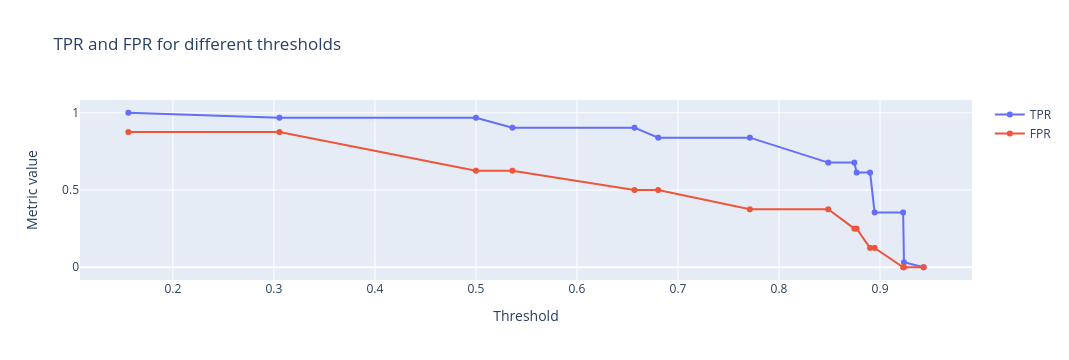

In [139]:
plotROC(Svc)

## Tune the hyper parameter for SVC and reduce dimension of dataset with PCA

In [140]:
pipe = make_pipeline(PCA(random_state=42), SVC())
param_grid={"pca__n_components": np.arange(1, 33),'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.1, 1, 10, 100]}
clf_gridSearch = RandomizedSearchCV(pipe, param_grid,cv=3, scoring='f1_macro')

In [141]:
clf_gridSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('svc', SVC())]),
                   param_distributions={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                                        'svc__C': [0.1, 1, 10, 100],
                                        'svc__gamma': [0.001, 0.01, 0.1, 1,
                                                       10]},
                   scoring='f1_macro')

In [142]:
pd.DataFrame(clf_gridSearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__gamma,param_svc__C,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005716,0.000385,0.003737,0.000109,1,100,11,"{'svc__gamma': 1, 'svc__C': 100, 'pca__n_compo...",0.442857,0.442857,0.441176,0.442297,0.000792,4
1,0.005543,0.000052,0.003735,0.000103,0.1,100,21,"{'svc__gamma': 0.1, 'svc__C': 100, 'pca__n_com...",0.442857,0.442857,0.441176,0.442297,0.000792,4
2,0.005534,0.000143,0.003956,0.000127,10,10,32,"{'svc__gamma': 10, 'svc__C': 10, 'pca__n_compo...",0.442857,0.442857,0.441176,0.442297,0.000792,4
3,0.005671,0.000407,0.004139,0.000323,0.001,1,31,"{'svc__gamma': 0.001, 'svc__C': 1, 'pca__n_com...",0.541176,0.442857,0.441176,0.475070,0.046749,2
4,0.006298,0.000731,0.004309,0.000785,0.1,1,32,"{'svc__gamma': 0.1, 'svc__C': 1, 'pca__n_compo...",0.442857,0.442857,0.441176,0.442297,0.000792,4
5,0.005551,0.000020,0.003788,0.000166,0.1,10,11,"{'svc__gamma': 0.1, 'svc__C': 10, 'pca__n_comp...",0.442857,0.442857,0.441176,0.442297,0.000792,4
6,0.005615,0.000587,0.004222,0.000908,0.01,0.1,22,"{'svc__gamma': 0.01, 'svc__C': 0.1, 'pca__n_co...",0.442857,0.442857,0.441176,0.442297,0.000792,4
7,0.004697,0.000177,0.003349,0.000012,0.001,1,28,"{'svc__gamma': 0.001, 'svc__C': 1, 'pca__n_com...",0.541176,0.442857,0.441176,0.475070,0.046749,2
8,0.004684,0.000119,0.003283,0.000184,0.001,10,16,"{'svc__gamma': 0.001, 'svc__C': 10, 'pca__n_co...",0.546032,0.507576,0.649770,0.567792,0.060055,1
9,0.004906,0.000071,0.003324,0.000019,0.01,1,13,"{'svc__gamma': 0.01, 'svc__C': 1, 'pca__n_comp...",0.442857,0.442857,0.441176,0.442297,0.000792,4


In [143]:
print('GridSearch CV best score : {:.4f}\n\n'.format(clf_gridSearch.best_score_))
print('Parameters that give the best results :','\n\n', (clf_gridSearch.best_params_))

GridSearch CV best score : 0.5678


Parameters that give the best results : 

 {'svc__gamma': 0.001, 'svc__C': 10, 'pca__n_components': 16}


### Best Model

In [144]:
svc = make_pipeline(preprocessing.StandardScaler(),PCA(n_components=31),SVC(kernel='linear',C=100,gamma=0.001,probability=True))
svc.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=31)),
                ('svc',
                 SVC(C=100, gamma=0.001, kernel='linear', probability=True))])

In [145]:
Y_pred = svc.predict(X_test) 

In [146]:
Show(svc)

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.85      0.94      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.66      0.68        39
weighted avg       0.80      0.82      0.80        39

Confusion matrix 
 [[ 3  5]
 [ 2 29]]
accuracy: 0.821


In [147]:
test_score1 = accuracy_score(y_test, svc.predict(X_test)) * 100
train_score1 = accuracy_score(y_train, svc.predict(X_train)) * 100
print(test_score1,train_score1)

82.05128205128204 93.10344827586206


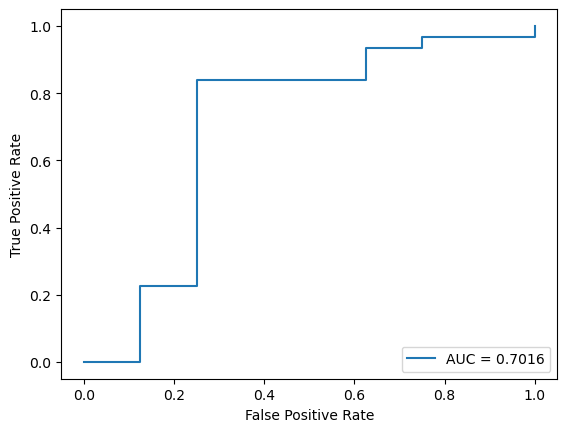

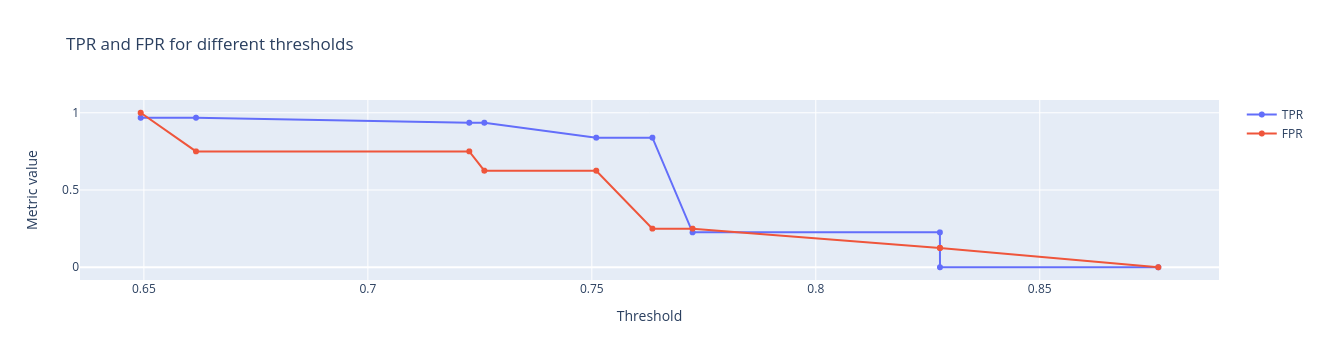

In [148]:
plotROC(svc)

# 2.Logistic Regression

## Model Without Hyperparameter

In [149]:
log= make_pipeline(preprocessing.StandardScaler(),LogisticRegression())
log.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [150]:
Y_pred = log.predict(X_test) 

In [151]:
Show(log)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.86      0.97      0.91        31

    accuracy                           0.85        39
   macro avg       0.80      0.67      0.70        39
weighted avg       0.84      0.85      0.83        39

Confusion matrix 
 [[ 3  5]
 [ 1 30]]
accuracy: 0.846


In [152]:
test_score12 = accuracy_score(y_test, log.predict(X_test)) * 100
train_score12 = accuracy_score(y_train, log.predict(X_train)) * 100
print(test_score12,train_score12)

84.61538461538461 88.79310344827587


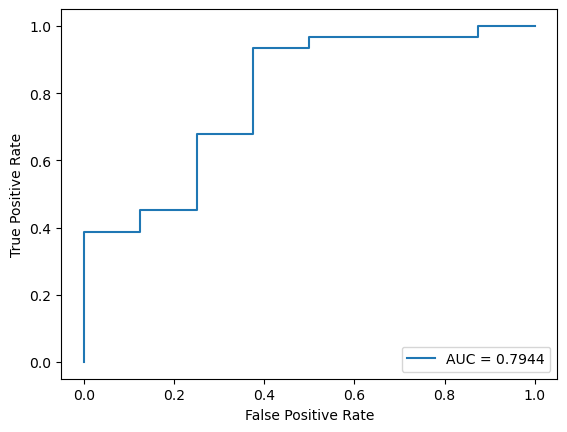

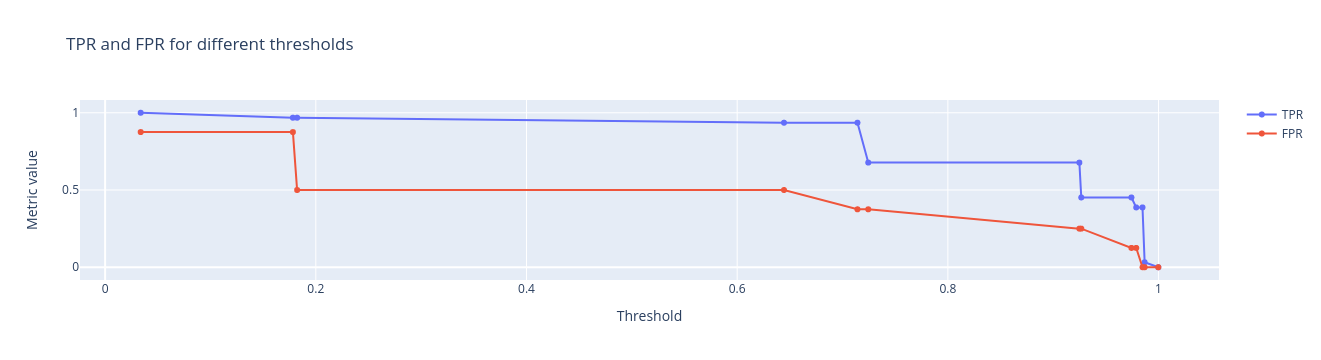

In [153]:
plotROC(log)

## Tune haperparameters And Feature selection with PCA

In [154]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer

In [155]:
params={"pca__n_components": np.arange(1, 33),'model__C':[.01,.05,.1,.5,1,5,10],
           'model__penalty':['l1','l2'],"model__class_weight":["balanced", None]}
pipeline = Pipeline([('StandardScaler()', StandardScaler()),('pca',PCA()),
    ('model',LogisticRegression())])
grid = GridSearchCV(pipeline, cv=5,n_jobs=-1, param_grid=params ,scoring='f1_macro')

In [156]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('StandardScaler()', StandardScaler()),
                                       ('pca', PCA()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                         'model__class_weight': ['balanced', None],
                         'model__penalty': ['l1', 'l2'],
                         'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])},
             scoring='f1_macro')

In [157]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__class_weight,param_model__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006899,0.003683,0.000000,0.000000,0.01,balanced,l1,1,"{'model__C': 0.01, 'model__class_weight': 'bal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,449
1,0.004727,0.000506,0.000000,0.000000,0.01,balanced,l1,2,"{'model__C': 0.01, 'model__class_weight': 'bal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,449
2,0.007224,0.005095,0.000000,0.000000,0.01,balanced,l1,3,"{'model__C': 0.01, 'model__class_weight': 'bal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,449
3,0.005172,0.000391,0.000000,0.000000,0.01,balanced,l1,4,"{'model__C': 0.01, 'model__class_weight': 'bal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,449
4,0.004306,0.001087,0.000000,0.000000,0.01,balanced,l1,5,"{'model__C': 0.01, 'model__class_weight': 'bal...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,0.018606,0.005839,0.002771,0.000647,10,None,l2,28,"{'model__C': 10, 'model__class_weight': None, ...",0.621053,0.744444,0.654655,0.697368,0.744444,0.692393,0.048902,357
892,0.013404,0.001741,0.002241,0.000134,10,None,l2,29,"{'model__C': 10, 'model__class_weight': None, ...",0.621053,0.744444,0.654655,0.697368,0.744444,0.692393,0.048902,357
893,0.014418,0.001401,0.002605,0.000438,10,None,l2,30,"{'model__C': 10, 'model__class_weight': None, ...",0.621053,0.744444,0.654655,0.697368,0.744444,0.692393,0.048902,357
894,0.019699,0.004567,0.003058,0.000717,10,None,l2,31,"{'model__C': 10, 'model__class_weight': None, ...",0.621053,0.744444,0.654655,0.697368,0.744444,0.692393,0.048902,357


In [158]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid.best_score_))

print('Parameters that give the best results :','\n\n', (grid.best_params_))


GridSearch CV best score : 0.7861


Parameters that give the best results : 

 {'model__C': 0.5, 'model__class_weight': None, 'model__penalty': 'l2', 'pca__n_components': 9}


### Best Model

In [159]:
logistic = make_pipeline(preprocessing.StandardScaler(),PCA(n_components=9),LogisticRegression(C=0.5,penalty='l2'))
logistic.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=9)),
                ('logisticregression', LogisticRegression(C=0.5))])

In [160]:
Y_pred = logistic.predict(X_test) 

In [161]:
Show(logistic)

              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39

Confusion matrix 
 [[ 4  4]
 [ 1 30]]
accuracy: 0.872


## the percision of recall of lable 1 become better which is used tune hyperparameters

In [162]:
test_score2= accuracy_score(y_test, logistic.predict(X_test)) * 100
train_score2= accuracy_score(y_train, logistic.predict(X_train)) * 100
test_score2,train_score2

(87.17948717948718, 89.65517241379311)

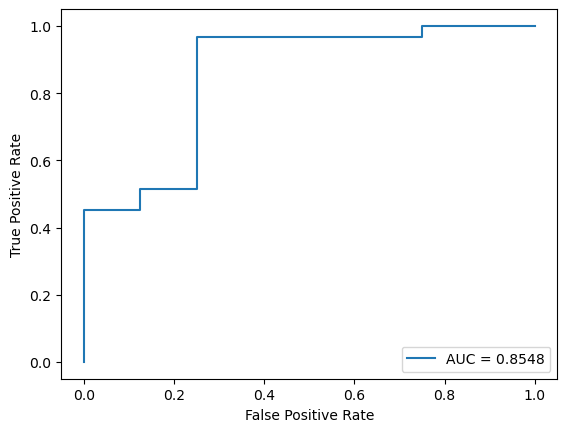

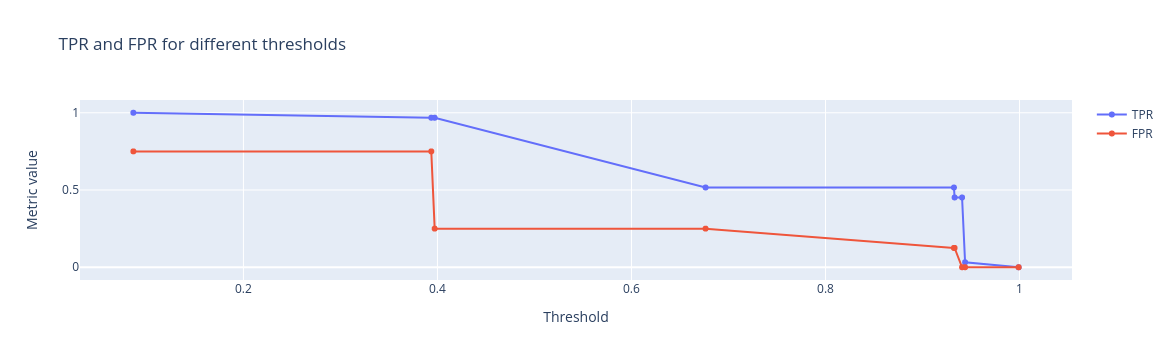

In [163]:
plotROC(logistic)

# ******************************************************************************************************

# 3.Stacking Classifier

## Modeld Without Hyperparameter

In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier

In [165]:
stacking= StackingClassifier(
estimators=[
('lr', LogisticRegression(max_iter=1000,random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', make_pipeline(preprocessing.StandardScaler(),SVC(probability=True, random_state=42)))
],stack_method='auto',
final_estimator=RandomForestClassifier(random_state=43),
)

In [166]:
stacking.fit(X_train, y_train);

In [167]:
Y_pred = stacking.predict(X_test) 

In [168]:
Show(stacking)

              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.81      0.97      0.88        31

    accuracy                           0.79        39
   macro avg       0.66      0.55      0.54        39
weighted avg       0.75      0.79      0.74        39

Confusion matrix 
 [[ 1  7]
 [ 1 30]]
accuracy: 0.795


In [169]:
test_score13= accuracy_score(y_test, stacking.predict(X_test)) * 100
train_score13= accuracy_score(y_train, stacking.predict(X_train)) * 100
test_score13,train_score13

(79.48717948717949, 96.55172413793103)

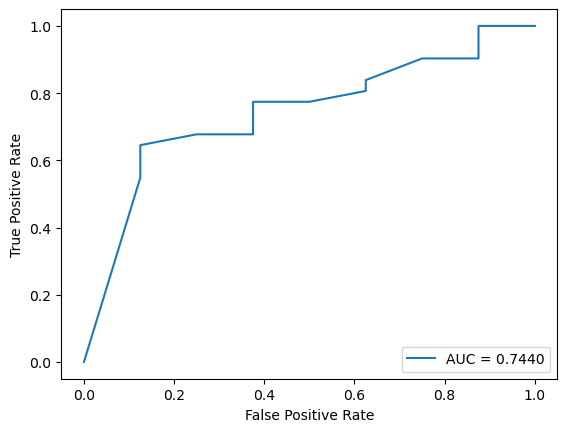

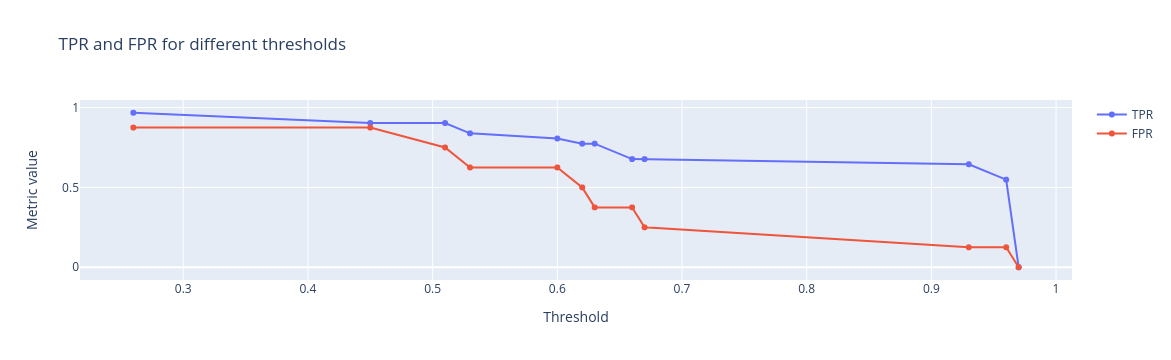

In [170]:
plotROC(stacking)

## tune Hyperparameters

In [171]:
stacking_clf = StackingClassifier(
estimators=[
('lr', LogisticRegression(max_iter=1000,random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', make_pipeline(preprocessing.StandardScaler(),SVC(probability=True, random_state=42)))
],stack_method='auto',
final_estimator=RandomForestClassifier(random_state=43),
)
param_search = {
    'final_estimator__max_depth': [1,3,5],"final_estimator__class_weight":["balanced", None]
    }
gridcv = GridSearchCV(stacking_clf , 
                      param_grid=param_search)

In [172]:
gridcv.fit(X_train, y_train)

GridSearchCV(estimator=StackingClassifier(estimators=[('lr',
                                                       LogisticRegression(max_iter=1000,
                                                                          random_state=42)),
                                                      ('rf',
                                                       RandomForestClassifier(random_state=42)),
                                                      ('svc',
                                                       Pipeline(steps=[('standardscaler',
                                                                        StandardScaler()),
                                                                       ('svc',
                                                                        SVC(probability=True,
                                                                            random_state=42))]))],
                                          final_estimator=RandomForestClassifier(random_state=43)),
             param_grid={'final_estimator__class_weight': ['balanced', None],
                         'final_estimator__max_depth': [1, 3, 5]})

In [173]:
pd.DataFrame(gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_final_estimator__class_weight,param_final_estimator__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.510261,0.069876,0.034011,0.001943,balanced,1,"{'final_estimator__class_weight': 'balanced', ...",0.666667,0.869565,0.782609,0.826087,0.826087,0.794203,0.069444,6
1,2.489982,0.061915,0.034453,0.002515,balanced,3,"{'final_estimator__class_weight': 'balanced', ...",0.750000,0.869565,0.826087,0.826087,0.826087,0.819565,0.038644,3
2,2.563082,0.095597,0.033614,0.000591,balanced,5,"{'final_estimator__class_weight': 'balanced', ...",0.833333,0.782609,0.782609,0.826087,0.826087,0.810145,0.022638,5
3,2.597040,0.062504,0.034320,0.001532,None,1,"{'final_estimator__class_weight': None, 'final...",0.875000,0.826087,0.739130,0.913043,0.826087,0.835870,0.058373,2
4,2.508829,0.059394,0.034225,0.002284,None,3,"{'final_estimator__class_weight': None, 'final...",0.791667,0.826087,0.782609,0.869565,0.826087,0.819203,0.030752,4
5,2.496522,0.069344,0.034013,0.001082,None,5,"{'final_estimator__class_weight': None, 'final...",0.791667,0.782609,0.913043,0.869565,0.826087,0.836594,0.048939,1


In [174]:
print('GridSearch CV best score : {:.4f}\n\n'.format(gridcv.best_score_))

print('Parameters that give the best results :','\n\n', (gridcv.best_params_))

GridSearch CV best score : 0.8366


Parameters that give the best results : 

 {'final_estimator__class_weight': None, 'final_estimator__max_depth': 5}


### Best Model

In [175]:
stacking_clf1 = StackingClassifier(
estimators=[
('lr', LogisticRegression(max_iter=1000,random_state=42)),
('rf', RandomForestClassifier(random_state=42)),
('svc', make_pipeline(preprocessing.StandardScaler(),SVC(probability=True, random_state=42)))
],stack_method='auto',
final_estimator=GradientBoostingClassifier(max_depth= 1),
)

In [176]:
stacking_clf1.fit(X_train, y_train);

In [177]:
Y_pred = stacking_clf1.predict(X_test) 

In [178]:
Show(stacking_clf1)

              precision    recall  f1-score   support

           0       0.75      0.38      0.50         8
           1       0.86      0.97      0.91        31

    accuracy                           0.85        39
   macro avg       0.80      0.67      0.70        39
weighted avg       0.84      0.85      0.83        39

Confusion matrix 
 [[ 3  5]
 [ 1 30]]
accuracy: 0.846


In [179]:
test_score3= accuracy_score(y_test, stacking_clf1.predict(X_test)) * 100
train_score3= accuracy_score(y_train, stacking_clf1.predict(X_train)) * 100
test_score3,train_score3

(84.61538461538461, 99.13793103448276)

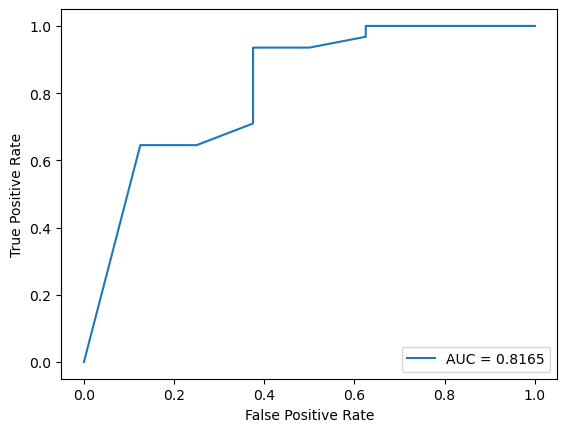

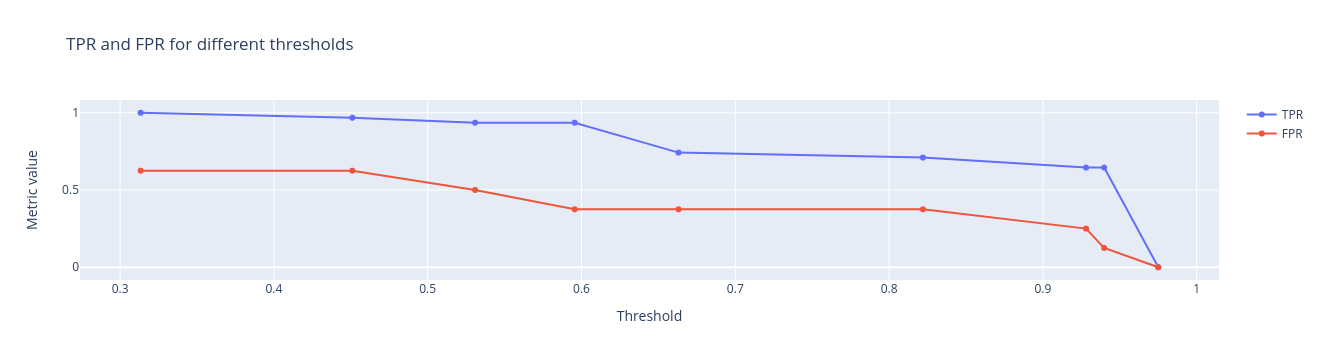

In [180]:
plotROC(stacking_clf1)

# **********************************************************************************************************

# 4.KNeighborsClassifier

## Model without Hyperparameters

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold


In [182]:
knn_= make_pipeline(preprocessing.StandardScaler(),KNeighborsClassifier())
knn_.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [183]:
Y_pred = knn_.predict(X_test) 

In [184]:
Show(knn_)

              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.85      0.94      0.89        31

    accuracy                           0.82        39
   macro avg       0.73      0.66      0.68        39
weighted avg       0.80      0.82      0.80        39

Confusion matrix 
 [[ 3  5]
 [ 2 29]]
accuracy: 0.821


In [185]:
test_score14= accuracy_score(y_test, knn_.predict(X_test)) * 100
train_score14= accuracy_score(y_train, knn_.predict(X_train)) * 100
test_score14,train_score14

(82.05128205128204, 87.93103448275862)

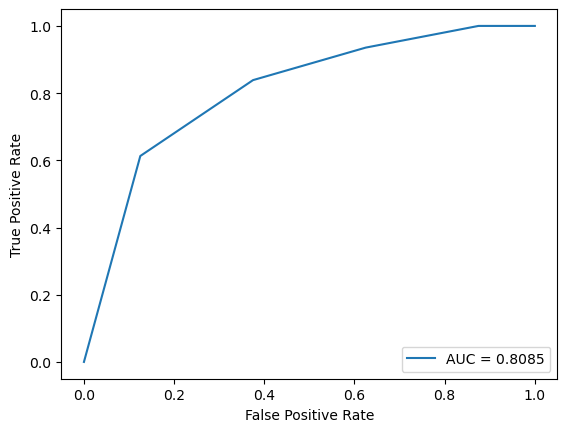

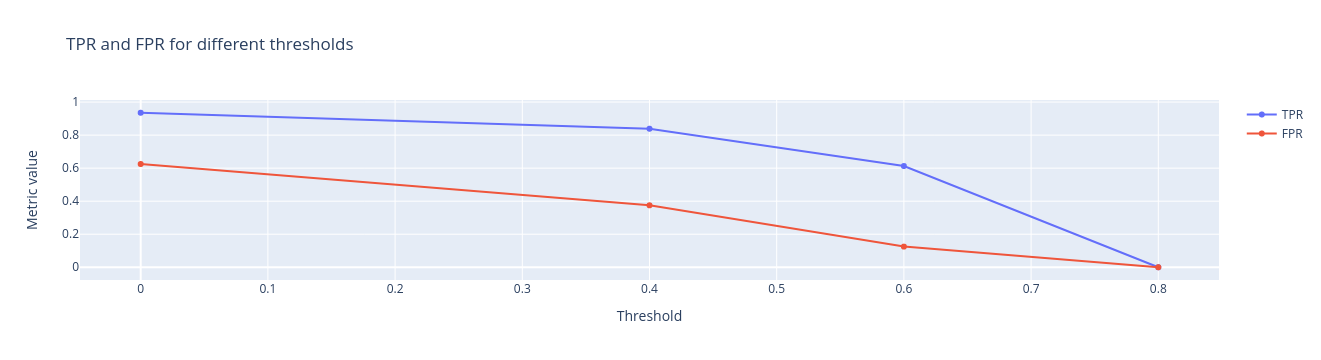

In [186]:
plotROC(knn_)

## Tune Hyperparameters And Feature selection with PCA

In [187]:
import warnings
warnings.filterwarnings("ignore")
pipe1 = Pipeline([('StandardScaler()', StandardScaler()),('pca',PCA()),
    ('clf', KNeighborsClassifier()),
])


parameters = {"pca__n_components": np.arange(1, 33),
    'clf__n_neighbors': range(1,30),"clf__weights":["balanced", None]
    }
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

gs = GridSearchCV(pipe1, parameters,cv=kf,n_jobs=-1, scoring='f1_macro')
gs.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('StandardScaler()', StandardScaler()),
                                       ('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': range(1, 30),
                         'clf__weights': ['balanced', None],
                         'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])},
             scoring='f1_macro')

In [188]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__n_neighbors,param_clf__weights,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004918,0.000516,0.000000,0.000000,1,balanced,1,"{'clf__n_neighbors': 1, 'clf__weights': 'balan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
1,0.004631,0.000129,0.000000,0.000000,1,balanced,2,"{'clf__n_neighbors': 1, 'clf__weights': 'balan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
2,0.005581,0.001542,0.000000,0.000000,1,balanced,3,"{'clf__n_neighbors': 1, 'clf__weights': 'balan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
3,0.004323,0.000441,0.000000,0.000000,1,balanced,4,"{'clf__n_neighbors': 1, 'clf__weights': 'balan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
4,0.004443,0.000787,0.000000,0.000000,1,balanced,5,"{'clf__n_neighbors': 1, 'clf__weights': 'balan...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,0.006311,0.001950,0.010852,0.000472,29,None,28,"{'clf__n_neighbors': 29, 'clf__weights': None,...",0.414634,0.616667,0.425,0.616667,0.452381,0.50507,0.09195,915
1852,0.005917,0.001777,0.012447,0.002830,29,None,29,"{'clf__n_neighbors': 29, 'clf__weights': None,...",0.414634,0.616667,0.425,0.616667,0.452381,0.50507,0.09195,915
1853,0.004867,0.000291,0.010943,0.000184,29,None,30,"{'clf__n_neighbors': 29, 'clf__weights': None,...",0.414634,0.616667,0.425,0.616667,0.452381,0.50507,0.09195,915
1854,0.006360,0.002101,0.010846,0.000256,29,None,31,"{'clf__n_neighbors': 29, 'clf__weights': None,...",0.414634,0.616667,0.425,0.616667,0.452381,0.50507,0.09195,915


In [189]:
print('GridSearch CV best score : {:.4f}\n\n'.format(gs.best_score_))
print('Parameters that give the best results :','\n\n', (gs.best_params_))

GridSearch CV best score : 0.7833


Parameters that give the best results : 

 {'clf__n_neighbors': 2, 'clf__weights': None, 'pca__n_components': 19}


## Best Model

In [190]:
knn= make_pipeline(preprocessing.StandardScaler(),PCA(n_components=19),KNeighborsClassifier(n_neighbors=2))
knn.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=19)),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=2))])

In [191]:
Y_pred = knn.predict(X_test) 

In [192]:
Show(knn)

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.86      0.81      0.83        31

    accuracy                           0.74        39
   macro avg       0.63      0.65      0.64        39
weighted avg       0.77      0.74      0.75        39

Confusion matrix 
 [[ 4  4]
 [ 6 25]]
accuracy: 0.744


In [193]:
test_score4= accuracy_score(y_test, knn.predict(X_test)) * 100
train_score4= accuracy_score(y_train, knn.predict(X_train)) * 100
test_score4,train_score4

(74.35897435897436, 91.37931034482759)

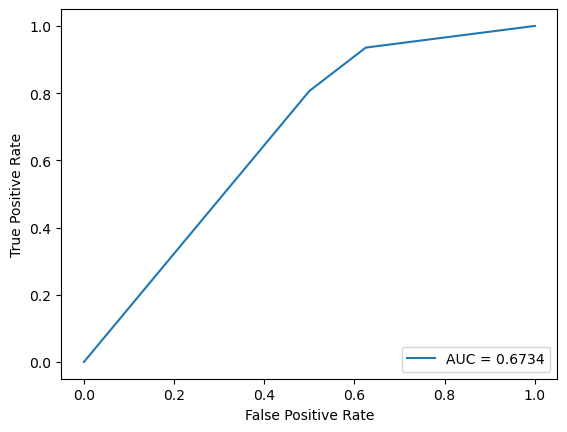

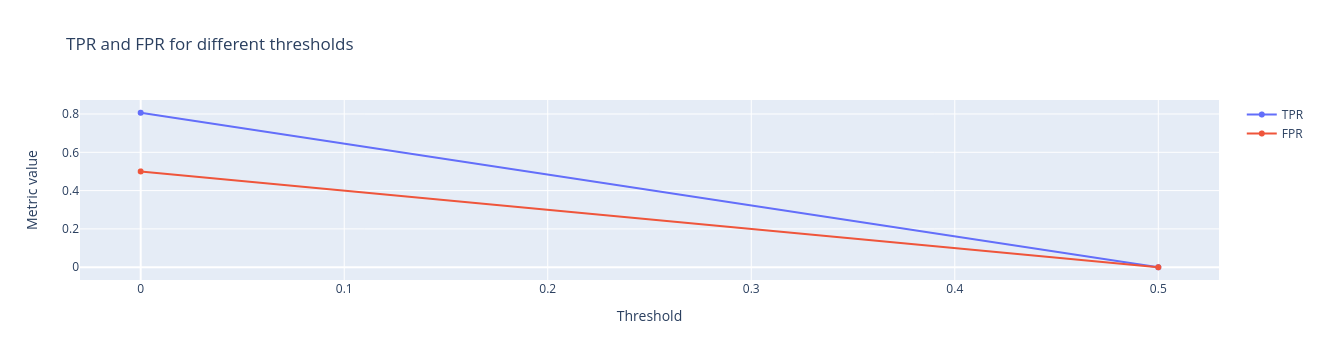

In [194]:
plotROC(knn)

# *******************************************************************************************************

# 5.RandomForestClassifier

## Model without HyperParameters

In [195]:
random_= make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier())
random_.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [196]:
Y_pred = random_.predict(X_test) 

In [197]:
Show(random_)

              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.82      0.90      0.86        31

    accuracy                           0.77        39
   macro avg       0.61      0.58      0.58        39
weighted avg       0.74      0.77      0.75        39

Confusion matrix 
 [[ 2  6]
 [ 3 28]]
accuracy: 0.769


In [198]:
test_score15= accuracy_score(y_test, random_.predict(X_test)) * 100
train_score15= accuracy_score(y_train, random_.predict(X_train)) * 100
test_score15,train_score15

(76.92307692307693, 100.0)

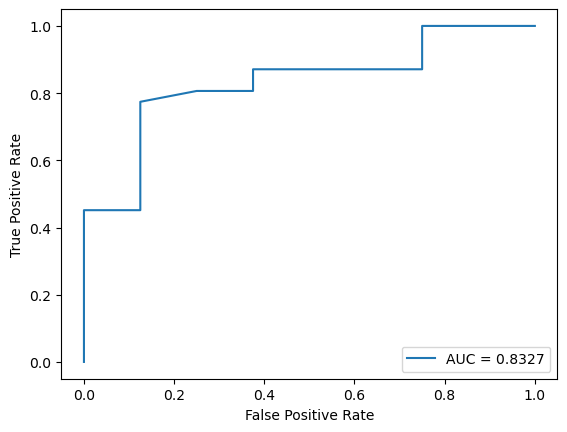

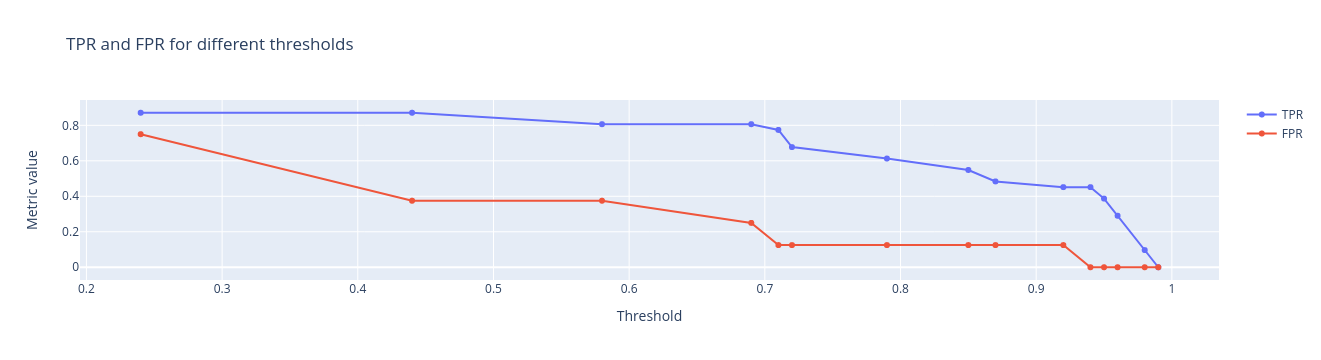

In [199]:
plotROC(random_)

## Tune Hyperparametres

In [200]:
rf_pipeline = Pipeline([('StandardScaler()', StandardScaler()),
                       ("RF", RandomForestClassifier())])

grid = {
    'RF__n_estimators' : [100,200,300],
    'RF__max_depth' : [1,5,10],"RF__class_weight":["balanced", None]

}
grid_search_cv = GridSearchCV(rf_pipeline, grid,  n_jobs = -1)

In [201]:
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('StandardScaler()', StandardScaler()),
                                       ('RF', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'RF__class_weight': ['balanced', None],
                         'RF__max_depth': [1, 5, 10],
                         'RF__n_estimators': [100, 200, 300]})

In [202]:
pd.DataFrame(grid_search_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__class_weight,param_RF__max_depth,param_RF__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.512018,0.053916,0.040658,0.015315,balanced,1,100,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.833333,0.913043,0.826087,0.782609,0.826087,0.836232,0.042402,12
1,0.948091,0.101670,0.050787,0.001961,balanced,1,200,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.833333,0.869565,0.826087,0.739130,0.826087,0.818841,0.042992,15
2,1.222951,0.028976,0.082317,0.009678,balanced,1,300,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.833333,0.869565,0.826087,0.782609,0.826087,0.827536,0.027650,14
3,0.418738,0.010350,0.028290,0.003084,balanced,5,100,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.875000,0.913043,0.826087,0.869565,0.913043,0.879348,0.032318,2
4,0.826598,0.008416,0.051302,0.001077,balanced,5,200,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.875000,0.913043,0.869565,0.869565,0.782609,0.861957,0.042876,5
5,1.335561,0.081940,0.088366,0.016738,balanced,5,300,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.833333,0.869565,0.869565,0.869565,0.826087,0.853623,0.019659,8
6,0.563096,0.074022,0.040010,0.014468,balanced,10,100,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.875000,0.869565,0.869565,0.913043,0.826087,0.870652,0.027584,4
7,0.996607,0.081325,0.052015,0.001745,balanced,10,200,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.875000,0.913043,0.913043,0.913043,0.826087,0.888043,0.034304,1
8,1.266950,0.042231,0.101389,0.035725,balanced,10,300,"{'RF__class_weight': 'balanced', 'RF__max_dept...",0.875000,0.869565,0.869565,0.869565,0.826087,0.861957,0.018058,6
9,0.498010,0.084998,0.033027,0.008711,None,1,100,"{'RF__class_weight': None, 'RF__max_depth': 1,...",0.791667,0.782609,0.782609,0.782609,0.826087,0.793116,0.016855,17


In [203]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search_cv.best_score_))


print('Parameters that give the best results :','\n\n', (grid_search_cv.best_params_))

GridSearch CV best score : 0.8880


Parameters that give the best results : 

 {'RF__class_weight': 'balanced', 'RF__max_depth': 10, 'RF__n_estimators': 200}


## Best Model

In [204]:
random= make_pipeline(preprocessing.StandardScaler(), RandomForestClassifier(n_estimators=200,max_depth=10,random_state=44,class_weight='balanced'))
random.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=10,
                                        n_estimators=200, random_state=44))])

In [205]:
Y_pred = random.predict(X_test) 

In [206]:
Show(random)

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.83      0.94      0.88        31

    accuracy                           0.79        39
   macro avg       0.66      0.59      0.61        39
weighted avg       0.76      0.79      0.77        39

Confusion matrix 
 [[ 2  6]
 [ 2 29]]
accuracy: 0.795


In [207]:
test_score5= accuracy_score(y_test, random.predict(X_test)) * 100
train_score5= accuracy_score(y_train, random.predict(X_train)) * 100
test_score5,train_score5

(79.48717948717949, 100.0)

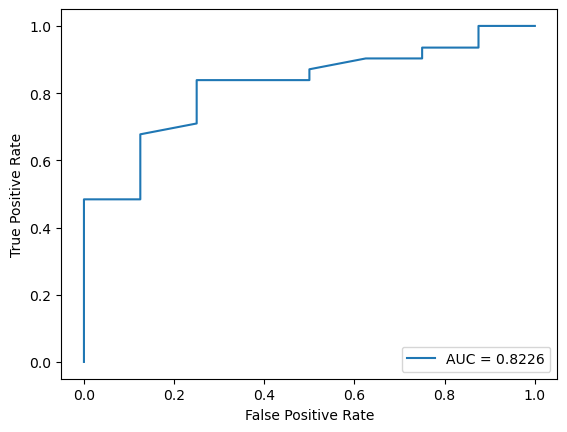

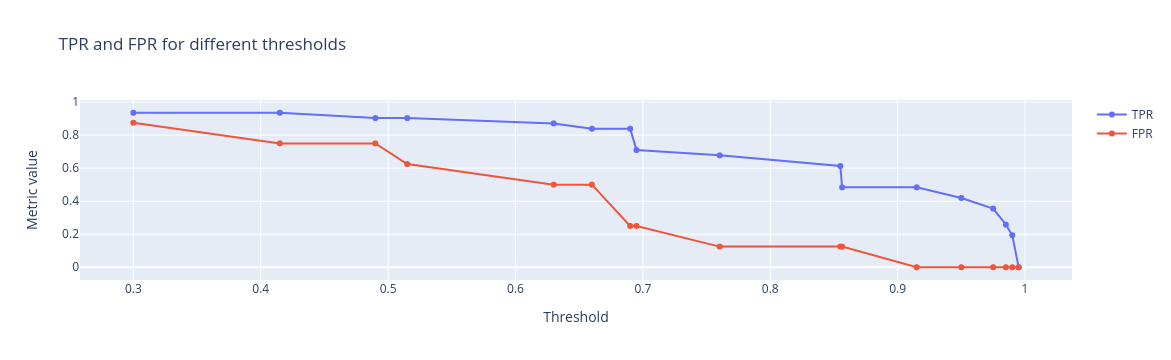

In [208]:
plotROC(random)

# Final Result With tune Hyperparameters

In [209]:
data={'Model':['SVM','LogitcReg','Stacking','KNN','RandomForest'],'Test_Accuracy':[test_score1,test_score2,test_score3,test_score4,test_score5],
     'Train_Accuracy':[train_score1,train_score2,train_score3,train_score4,train_score5]}
result=pd.DataFrame(data)
result

,Model,Test_Accuracy,Train_Accuracy
0,SVM,82.051282,93.103448
1,LogitcReg,87.179487,89.655172
2,Stacking,84.615385,99.137931
3,KNN,74.358974,91.379310
4,RandomForest,79.487179,100.000000


## the best result for Logistic regression with 87% accuracy after tune hyperparameters

# Final result without hyperparameters

In [107]:
data1={'Model':['SVM','LogitcReg','Stacking','KNN','RandomForest'],'Test_Accuracy':[test_score11,test_score12,test_score13,test_score14,test_score15],
     'Train_Accuracy':[train_score11,train_score12,train_score13,train_score14,train_score15]}
result=pd.DataFrame(data1)
result

,Model,Test_Accuracy,Train_Accuracy
0,SVM,84.615385,95.689655
1,LogitcReg,84.615385,88.793103
2,Stacking,79.487179,96.551724
3,KNN,82.051282,87.931034
4,RandomForest,79.487179,100.000000
